<a href="https://colab.research.google.com/github/vsoos/CloudComputing/blob/main/ex5/5_notebook2_cpu/5_2_cpu_AuraBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model 2 - Simple chat bot (Aura Bot)

In [ ]:
!pip install -q tensorflow
!pip install -q nltk
!pip install -q colorama
!pip install -q numpy
!pip install -q scikit_learn
!pip install -q Flask

In [ ]:
import json
import os
import numpy as np
import colorama
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import colorama
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle

In [ ]:
folder_path = '/content/drive/MyDrive/cloudcomputing2023_VincenzinaSoos/ex5/5_notebook2_cpu'
os.chdir(folder_path)

In [ ]:
with open('data/faq.json') as file:
    data = json.load(file)

training_sentences = []
training_labels = []
labels = []
responses = []


for intent in data['intents']:
    for question in intent['question']:
        training_sentences.append(question)
        training_labels.append(intent['tag'])
    responses.append(intent['answer'])

    if intent['tag'] not in labels:
        labels.append(intent['tag'])

num_classes = len(labels)

In [ ]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

In [ ]:
vocab_size = 40000
embedding_dim = 16
max_len = 40
oov_token = "<OOV>"

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = tf.keras.utils.pad_sequences(sequences, truncating='post', maxlen=max_len)
early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=15)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(max_len,)))
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 40, 16)              │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 16)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1406)                │          91,390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 736,638 (2.81 MB)

 Trainable params: 736,638 (2.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 800
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs, callbacks=[early_stopping])

Epoch 1/800
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0023 - loss: 7.2478
Epoch 2/800
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0057 - loss: 7.1554
Epoch 3/800
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0078 - loss: 7.0167
Epoch 4/800
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0051 - loss: 6.9966
Epoch 5/800
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0067 - loss: 6.9483
Epoch 6/800
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0028 - loss: 6.8498
Epoch 7/800
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0051 - loss: 6.7616
Epoch 8/800
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0064 - loss: 6.6677
Epoch 9/800
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0038 - loss: 6.5671
Epoch 10/800
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0096 - loss: 6.4454
Epoch 11/800
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0113 - loss: 6.3916
Epoch 12/800
106/106 ━━━━━━━━━━━━━━━━━━━━

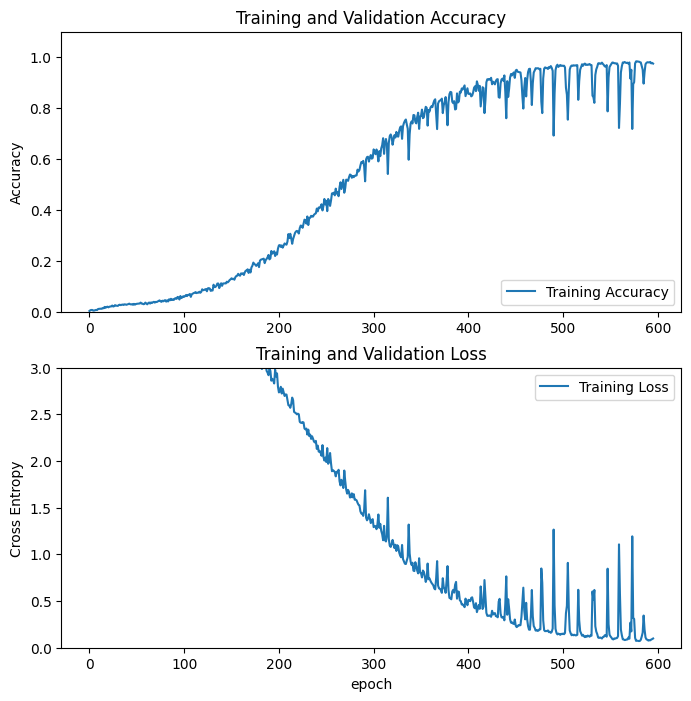

In [ ]:
import matplotlib.pyplot as plt
# visualize training_accuracy, training_loss, val_accuracy and val_loss
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

loss = history.history['loss']
# val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0,1.1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# to save the trained model
model.save("chat_model_2_aurabot.h5")

In [ ]:
import pickle

# to save the fitted tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# to save the fitted label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# disable TensorFlow warning messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
with open('data/faq.json') as file:
    data = json.load(file)

In [ ]:
def chat():
    unsure_text = "I'm sorry, unfortunately I don't have the answer for your question."

    # load trained model
    model = keras.models.load_model('chat_model_2_aurabot.h5')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    # max_len = 20

    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len), verbose=0)

        # this boolean indicates if the bot is unsure of the answer
        unsure = False

        # threshold is 85% -> under that, bot is unsure
        # when we have more questions, we might need
        # to adjust this lower (because there's more room for errors)
        if np.amax(result) < 0.6:
          unsure = True

        if not unsure:
          tag = lbl_encoder.inverse_transform([np.argmax(result)])

          for i in data['intents']:
              if i['tag'] == tag:
                  print(Fore.GREEN + "AuraBot AI:" + Style.RESET_ALL , np.random.choice(i['answer']))
        else:
          print(Fore.GREEN + "AuraBot AI:" + Style.RESET_ALL , unsure_text)

        # print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))

In [ ]:
print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()

Start messaging with the bot (type quit to stop)!


User: Hi
AuraBot AI: Welcome Back
User: who are you
AuraBot AI: My name's "Aurabot". I just wish that everyone had a nickname as cool as mine 😜
User: how are you
AuraBot AI: I'm Doing Great!! What about you?
User: what is political communication
AuraBot AI: Political communication can be defined as the connection concerning politics and citizens and the interaction modes that connect these groups to each other.
User: what is machine learning
AuraBot AI: Machine learning (ML) is the study of computer algorithms that can improve automatically through experience and by the use of data. It is seen as a part of artificial intelligence. Machine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisions without being explicitly programmed to do so. Machine learning algorithms are used in a wide variety of applications, such as in medicine, email filtering, speech recognition, and computer vision, where it is difficult or unfeasibl